Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import neural_network
from sklearn import utils
from sklearn import metrics
import pandas as pd # for loading the Excel data set file

Implementation of function that carries out stochastich gradient descent such that it returns the evolution of the functional $J({\omega})$

In [2]:
def stochastic_gradient(X,y,lr):
    i=0
    n=0
    clf = neural_network.MLPRegressor(hidden_layer_sizes=(10,10), max_iter = 1000, tol=1e-10,verbose=0,alpha=0,learning_rate_init=lr,solver='sgd')

    J_omegas = []
    ns = []

    while(1):
        clf.partial_fit([X[i,:]],[y[i]])
        y_eval = clf.predict(X)
        n=n+1
        J_omega = X.shape[0]*metrics.mean_squared_error(y_eval,y)
        J_omegas.append(J_omega)
        ns.append(n)
        i=i+1
        if (i>=X.shape[0]):
            X, y = utils.shuffle(X, y)
            i=0
        if n>=1000:
            break

    return J_omegas, ns

Implementation of function that carries out mini-batch gradient descent such that it returns the evolution of the functional $J({\omega})$

In [3]:
def minibatch_gradient(X,y,lr):
        
    N_b = 10  # needs to divide the training set size without remainder
    
    i=0
    n=0
    clf = neural_network.MLPRegressor(hidden_layer_sizes=(10,10), max_iter = 1000, tol=1e10,verbose=0,alpha=0,learning_rate_init=lr,solver='sgd')

    J_omegas = []
    ns =[]

    X_sub = np.array_split(X,N_b)
    y_sub = np.array_split(y,N_b)
       
    while(1):
        clf.partial_fit(X_sub[i],y_sub[i])
        y_eval = clf.predict(X)
        n=n+(X.shape[0]/N_b) 
        J_omega =X.shape[0]*metrics.mean_squared_error(y_eval,y)
        J_omegas.append(J_omega)
        ns.append(n)
        i=i+1
        if (i>=len(X_sub)):
            X, y = utils.shuffle(X, y)
            X_sub = np.array_split(X,N_b)
            y_sub = np.array_split(y,N_b)
            i=0
        if n>=1000:
            break

    return J_omegas, ns

Implementation of function that carries out batch gradient descent such that it returns the evolution of the functional $J({\omega})$

In [4]:
def batch_gradient(X,y,lr):
        
    i=0
    n=0
    clf = neural_network.MLPRegressor(hidden_layer_sizes=(10,10), max_iter = 1000, tol=1e-20,verbose=0,alpha=0,learning_rate_init=lr,solver='sgd')

    J_omegas = []
    ns =[]

    while(1):
        clf.partial_fit(X,y)
        y_eval = clf.predict(X)
        n=n+X.shape[0]
        J_omega =X.shape[0]*metrics.mean_squared_error(y_eval,y)
        J_omegas.append(J_omega)
        ns.append(n)
        i=i+1
        X, y = utils.shuffle(X, y)
        i=0
        if n>=1000:
            break

    return J_omegas, ns

Download and load the energy efficiency data set, furthermore scale the inputs

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
data_set = pd.read_excel('ENB2012_data.xlsx')
data_set_np = np.array(data_set)

N= 200

X = data_set_np[:N,:8]
y = data_set_np[:N,8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Plot magnitude of $J(\omega)$ during stochastic gradient descent for different learning rates

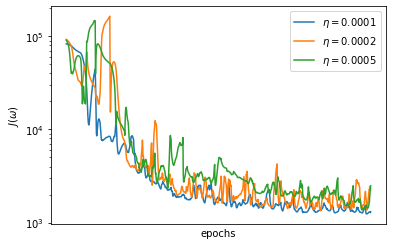

In [8]:
plt.figure()

errors, ns = stochastic_gradient(X, y,0.0001)
plt.semilogy(ns,errors, label="$\eta=0.0001$")

errors, ns = stochastic_gradient(X, y,0.0002)
plt.semilogy(ns,errors, label="$\eta=0.0002$")

errors, ns = stochastic_gradient(X, y,0.0005)
plt.semilogy(ns,errors, label="$\eta=0.0005$")

plt.xlabel("epochs")
plt.ylabel("$J(\omega)$")
plt.xticks(ticks=[])

plt.legend()
plt.show()

Plot magnitude of $J(\omega)$ during during gradient descent by different methods

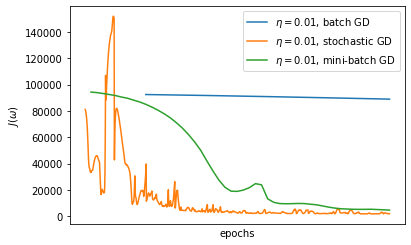

In [7]:
plt.figure()

errors, ns = batch_gradient(X, y,0.0005)
plt.plot(ns,errors, label="$\eta=0.0005$, batch GD")

errors, ns = stochastic_gradient(X, y,0.0005)
plt.plot(ns,errors, label="$\eta=0.0005$, stochastic GD")

errors, ns = minibatch_gradient(X, y,0.0005)
plt.plot(ns,errors, label="$\eta=0.0005$, mini-batch GD")


plt.xlabel("epochs")
plt.ylabel("$J(\omega)$")
plt.xticks(ticks=[])

plt.legend()
plt.show()